#1.1.1 Пример

In [48]:
def qZ(x, y):
    return (x - 3 * y + 1) / (3 * x ** 2 + 3 * y ** 2 + 1)
def qSumZ(Z):
    return sum(Z)
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]   
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    X[0] = oldX[sortedId[0]]
    X[1] = oldX[sortedId[1]]
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]
    return X, Y
def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    return sortedId
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X, Y, Z
def evoSteps(X, Y, stepsNum = 4):
    results = []
    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])
    return X, Y, results
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]
results = evoSteps(X, Y)
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')    
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]   
print(f'max Z:      {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z:      1.0


#Задание 1 вариант 2

In [49]:
def qZ(x, y):
    return (x - 2 * y - 3) / (x ** 2 + 3 * y ** 2 + 1)

X = [-4, -2, 0, 2]
Y = [-1, 1, 0, -2]
results = evoSteps(X, Y)
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')    
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]   
print(f'max Z:      {max(qualityArrZ)}')

max_1_step: -3.948529411764706
max_2_step: -0.41227180527383367
max_3_step: -0.2720588235294117
max_4_step: 0.37449290060851925
max Z:      0.17647058823529413


#1.2.1 Пример

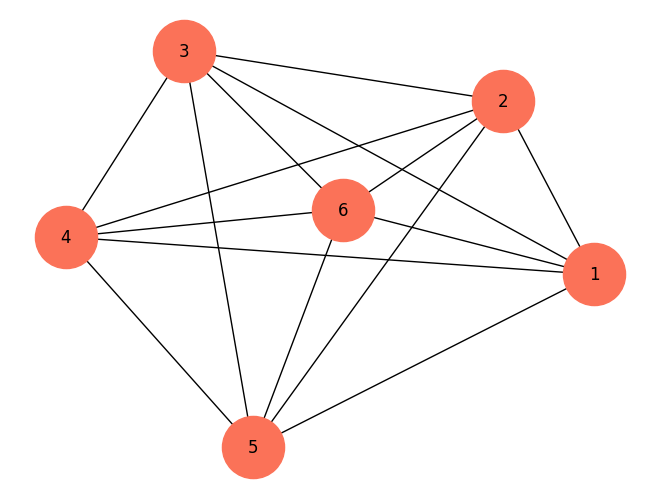

In [50]:
import networkx as nx
from math import e
distances = [(1, 2, 20),
            (1, 3, 40),
            (1, 4, 42),
            (1, 5, 33),
            (1, 6, 21),
            (2, 3, 26),
            (2, 4, 38),
            (2, 5, 42),
            (2, 6, 17),
            (3, 4, 22),
            (3, 5, 43),
            (3, 6, 21),
            (4, 5, 27),
            (4, 6, 22),
            (5, 6, 26)]
V = [1, 4, 5, 2, 6, 3, 1]
Z = [(3, 4),
     (4, 6),
     (5, 6),
     (6, 2)]
P = [49, 54, 43, 54]
T = 100
def probability(delta, T):
    return 100 * e ** (-delta / T)
def reductTemp(prevT):
    nextT = 0.5 * prevT    
    return nextT
graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 6, 2, 3, 5, 4, 1]
Длина лучшего выбранного маршрута: 176
Длины всех рассмотренных маршрутов: [189, 209, 186, 196, 176]


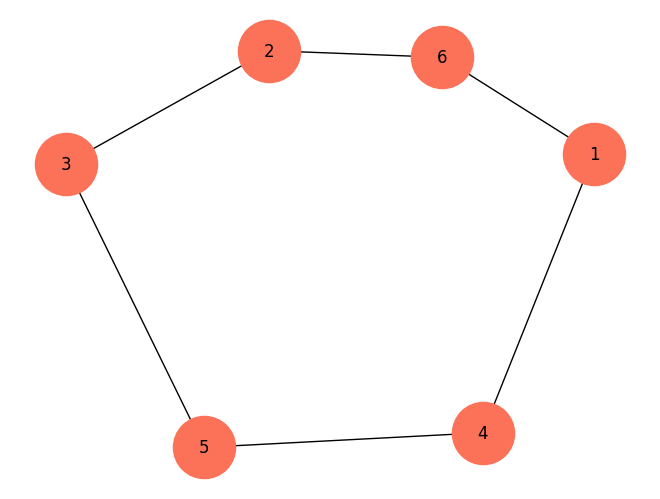

In [51]:
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    return sum(edges)
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength
        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = reductTemp(T)
    return V, arrSum
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i +1]:
                newDistances.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)

# Задание 2 вариант 2


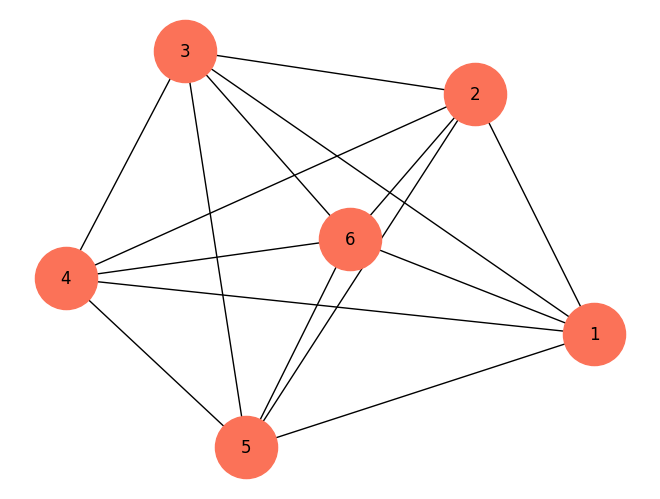

In [52]:
import networkx as nx
from math import e
distances = [(1, 2, 25),
            (1, 3, 41),
            (1, 4, 38),
            (1, 5, 27),
            (1, 6, 20),
            (2, 3, 21),
            (2, 4, 34),
            (2, 5, 39),
            (2, 6, 17),
            (3, 4, 24),
            (3, 5, 40),
            (3, 6, 22),
            (4, 5, 21),
            (4, 6, 21),
            (5, 6, 22)]
V = [1, 3, 5, 4, 6, 2, 1]
Z = [(3, 4),
     (4, 6),
     (5, 6),
     (2, 4)]
P = [41, 60, 85, 60]
T = 100
graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 2, 4, 3, 6, 5, 1]
Длина лучшего выбранного маршрута: 154
Длины всех рассмотренных маршрутов: [165, 150, 165, 180, 154]


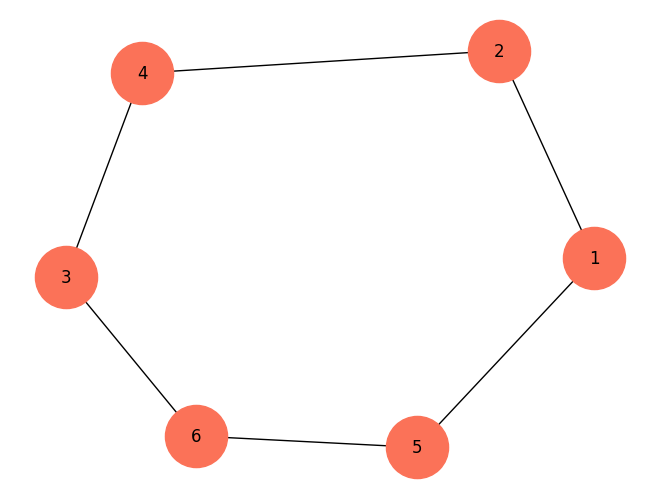

In [53]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)

На решенном уже примере поэкспериментируйте с показателем S, 
проанализируйте результаты.

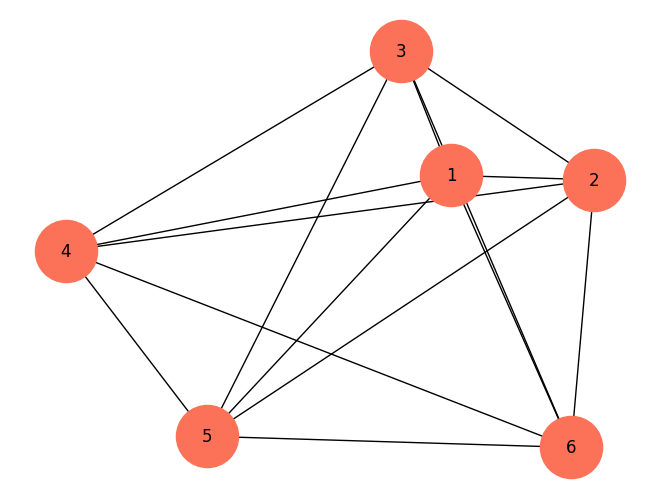

In [54]:
distances = [(1, 2, 10),
            (1, 3, 20),
            (1, 4, 30),
            (1, 5, 40),
            (1, 6, 50),
            (2, 3, 60),
            (2, 4, 70),
            (2, 5, 80),
            (2, 6, 90),
            (3, 4, 80),
            (3, 5, 70),
            (3, 6, 60),
            (4, 5, 50),
            (4, 6, 40),
            (5, 6, 30)]
V = [1, 3, 5, 4, 6, 2, 1]
Z = [(3, 4),
     (4, 6),
     (5, 6),
     (2, 4)]
P = [41, 60, 85, 60]
T = 100
graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 3, 4, 5, 6, 2, 1]
Длина лучшего выбранного маршрута: 280
Длины всех рассмотренных маршрутов: [280, 280, 330, 370, 330]


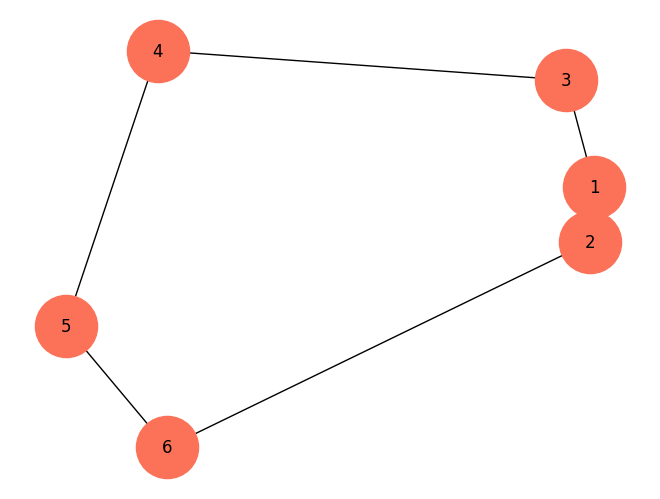

In [55]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)